## 1. 파이썬 모듈 불러오기

In [33]:
#Python 모듈
import os 
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')


# 데이터 전처리 모듈
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from scipy import io


# 시각화 모듈
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import mplcursors
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

#한글 폰트 설정 모듈
plt.rc('font', family='Malgun Gothic')


# 이미지 파일 불러오기 모듈
from IPython.display import Image

## 2. 데이터 경로 설정하기(/ 사용필수)

In [34]:
os.chdir("C:/Users/taeyu") #데이터 경로
print(os.getcwd())

C:\Users\taeyu


## 3. csv 파일 불러오기(Tektrnoix MSO54 모델 설정)

In [35]:
df = pd.read_csv('current_data.csv', header=None, index_col = False, skiprows=12) # Dataframe 데이터 , skiprows=22, 변경

In [36]:
df.head()

,0,1,2,3,4
0,-1.999996,0.004094,0.003750,-0.000041,-0.285938
1,-1.999986,0.005234,0.007500,0.000056,-0.300000
2,-1.999976,0.000891,0.000547,-0.000031,-0.296875
3,-1.999966,0.003000,0.004531,0.000256,-0.326562
4,-1.999956,0.004797,-0.001563,0.000287,-0.268750


## 4. 데이터 정보(Raw_data)

In [37]:
n_samples = len(df[1])
print('데이터 개수는 :',n_samples)

dt = df.iloc[4,0] - df.iloc[3,0]
print('Samling time :',dt)

time_f= (1/dt)*10**-6
print('Samling Frequency [MHz] :',time_f)

데이터 개수는 : 400000
Samling time : 9.999999999843467e-06
Samling Frequency [MHz] : 0.10000000000156531


## 5. 데이터 형변환(DataFrame -> nparray)

In [38]:
data = df.to_numpy()

## 6. Time domain 시각화

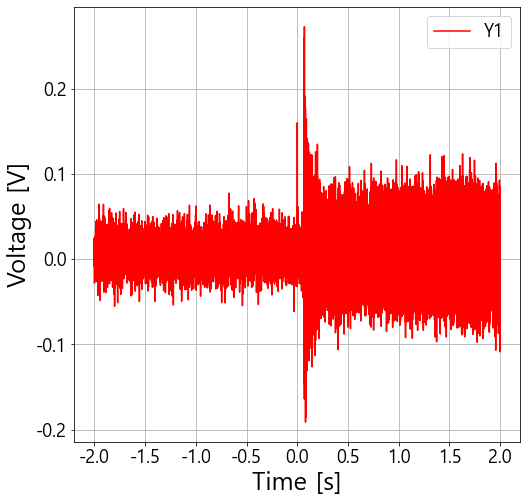

In [44]:
X = data[:,0]
Y = data[:,1]

plt.figure(figsize=(8,8))
plt.plot(X,Y,'r', label='Y1')
plt.xlabel("Time [s]", fontsize=25)
plt.ylabel("Voltage [V]", fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 18)
plt.grid()

## 7. Noise 제거를 위한 Moving average filter 설계

In [45]:
def movingaverage(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

MVF_Y1 = movingaverage(Y1,100) # filter size = 100 
print(MVF_Y1.shape)
MVF_X1 = data[99:,0]

print(MVF_X1.shape)



(399901,)
(399901,)


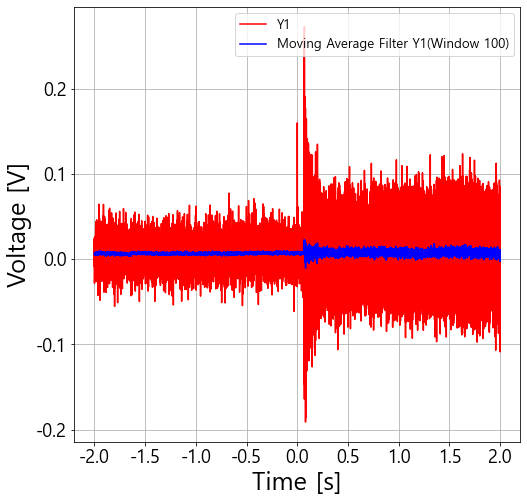

In [46]:
plt.figure(figsize=(8,8))
plt.plot(X,Y1,'r', label='Y1')
plt.plot(MVF_X1,MVF_Y1,'b', label='Moving Average Filter Y1(Window 100)')
plt.xlabel("Time [s]", fontsize=25)
plt.ylabel("Voltage [V]", fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 13)

plt.grid()